<a href="https://colab.research.google.com/github/OoZz26/Capstone-Project-SuperMarket-Data-Analysis/blob/main/capstpne_project_wrangling_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supermarket Dataset Wrangling**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# 1- Data Gathering

In [ ]:
Supermarket_data =pd.read_csv("/content/Capstone Data - Supermarket Sales.csv")

# 2- Data Assessing

In [ ]:
Supermarket_data.columns

Index(['Invoice ID', 'Branch', 'Yangon', 'Naypyitaw', 'Mandalay',
       'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity',
       'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'Rating'],
      dtype='object')

In [ ]:
Supermarket_data.head()

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


In [ ]:
Supermarket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [ ]:
Supermarket_data.duplicated().any()

True

In [ ]:
Supermarket_data.isna().any()

,0
Invoice ID,False
Branch,False
Yangon,False
Naypyitaw,False
Mandalay,False
Customer type,False
Gender,False
Product line,False
Unit price,False
Quantity,False


In [ ]:
Supermarket_data.describe()

,Yangon,Naypyitaw,Mandalay,Quantity,Tax 5%,Total,Rating
count,1006.000000,1006.000000,1006.000000,1006.000000,997.000000,1003.000000,1006.000000
mean,0.338966,0.329026,0.332008,5.469185,15.479682,322.734689,7.056163
std,0.473594,0.470093,0.471168,3.014153,11.728320,245.865964,3.318751
min,0.000000,0.000000,0.000000,-8.000000,0.508500,10.678500,4.000000
25%,0.000000,0.000000,0.000000,3.000000,5.986500,123.789750,5.500000
50%,0.000000,0.000000,0.000000,5.000000,12.227500,254.016000,7.000000
75%,1.000000,1.000000,1.000000,8.000000,22.720500,471.009000,8.500000
max,1.000000,1.000000,1.000000,10.000000,49.650000,1042.650000,97.000000


In [ ]:
for i in Supermarket_data.columns:
  print(Supermarket_data[i].value_counts(),"\n")

Invoice ID
645-44-1170    2
227-78-1148    2
479-26-8945    2
861-77-0145    2
588-01-7461    2
              ..
873-95-4984    1
416-13-5917    1
150-89-8043    1
135-84-8019    1
849-09-3807    1
Name: count, Length: 1000, dtype: int64 

Branch
A    341
B    334
C    331
Name: count, dtype: int64 

Yangon
0    665
1    341
Name: count, dtype: int64 

Naypyitaw
0    675
1    331
Name: count, dtype: int64 

Mandalay
0    672
1    334
Name: count, dtype: int64 

Customer type
Normal     515
Member     463
-           27
Memberr      1
Name: count, dtype: int64 

Gender
Male      525
Female    481
Name: count, dtype: int64 

Product line
Fashion accessories       179
Food and beverages        175
Electronic accessories    171
Sports and travel         167
Home and lifestyle        161
Health and beauty         153
Name: count, dtype: int64 

Unit price
83.77    3
48.5     2
60.95    2
22.01    2
24.74    2
        ..
55.97    1
76.9     1
97.03    1
44.65    1
88.34    1
Name: count, Len

In [ ]:
Supermarket_data[Supermarket_data["Tax 5%"].isna()]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
8,665-32-9167,A,1,0,0,Normal,Male,Health and beauty,36.26,2,NaN,76.1460,1/10/2019,17:15,Credit card,7.2
86,362-58-8315,C,0,1,0,Normal,Male,Fashion accessories,76.52,5,NaN,401.7300,3/25/2019,10:23,Cash,9.9
92,873-51-0671,A,1,0,0,Member,Female,Sports and travel,21.98,7,NaN,161.5530,1/10/2019,16:42,Ewallet,5.1
97,871-39-9221,C,0,1,0,Normal,Female,Electronic accessories,12.45 USD,6,NaN,78.4350,2/9/2019,13:11,Cash,4.1
629,308-39-1707,A,1,0,0,Normal,Female,Fashion accessories,12.09 USD,-1,NaN,12.6945,1/26/2019,18:19,Credit card,8.2
830,237-44-6163,A,1,0,0,Normal,Male,Electronic accessories,10.56 USD,-8,NaN,88.7040,1/24/2019,17:43,Cash,7.6
881,115-38-7388,C,0,1,0,Member,Female,Fashion accessories,10.18 USD,-8,NaN,85.5120,3/30/2019,12:51,Credit card,9.5
903,865-41-9075,A,1,0,0,Normal,Male,Food and beverages,11.53 USD,-7,NaN,84.7455,1/28/2019,17:35,Cash,8.1


In [ ]:
Supermarket_data[Supermarket_data["Total"].isna()]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
14,829-34-3910,A,1,0,0,Normal,Male,Health and beauty,71.38,10,35.6900,NaN,3/29/2019,19:21,Cash,5.7
37,272-65-1806,A,1,0,0,Normal,Male,Electronic accessories,60.88,9,27.3960,NaN,1/15/2019,17:17,Ewallet,4.7


### Data Quality Issues



*   Duplicates
*   Missing values in `Tax` and `Total` columns
*  Inconsistent values in `Quantity`column (typo) have negative values
*   Inconsistent data type in `Unit price` column because the inconsostant values
*   Inconsistent value (97) in `Rating` column
*   Inconsistent value in `Time` column 8 - 30 PM
*   Inconsistent values in `Customer type` column (typo) should write Member instead of Memberr
*   Inconsistent values in `Customer` column (-) don't know how to deal with it yet


### Data Tidiness Issues
1. Each variable forms a column and contains values:

  (Yangon,	Naypyitaw,	Mandalay) types are columns.
2.   Each observation forms a row:

      nothing
3.   Each type of observational unit forms a table:

      nothing





# 3- Data Cleaning

In [ ]:
Supermarket_data_copy =Supermarket_data.copy()

## Fix tidiness Issues:


### Problem:

Each variable forms a column and contains values:

(Yangon, Naypyitaw, Mandalay) types are columns.  we have two ways to fix this problem by mergering the the `(Yangon, Naypyitaw, Mandalay)` columns `City` or by branche  `Branch "A"` is `"Yangon"` `City` and `Branch "B"` is `Mandalay` `City` and `Branch "C"` is `Naypyitaw` `City`

In [ ]:
Supermarket_data_copy["City"] = Supermarket_data_copy["Branch"]

In [ ]:
Supermarket_data_copy["City"] = Supermarket_data_copy["City"].replace(["A","B","C"],["Yangon","Mandalay","Naypyitaw"])


### Test

In [ ]:
Supermarket_data_copy["City"]

,City
0,Yangon
1,Naypyitaw
2,Yangon
3,Yangon
4,Yangon
...,...
1001,Naypyitaw
1002,Mandalay
1003,Naypyitaw
1004,Mandalay


## Fix quality Issues





### Problem

*   Duplicates  we will remove them


### Code

In [ ]:
Supermarket_data_copy.drop_duplicates(inplace= True)

### Test

In [ ]:
Supermarket_data_copy.duplicated().any()

False

### Problem

Inconsistent data type in `Unit price` column because the inconsostant values  We will remove the "USD" From the Text and change the data type to `folat`


### Code

In [ ]:
Supermarket_data_copy["Unit price"] = Supermarket_data_copy["Unit price"].str.replace(' USD', '')
Supermarket_data_copy["Unit price"] = Supermarket_data_copy["Unit price"].astype(float)

### Test

In [ ]:
Supermarket_data_copy["Unit price"].value_counts()

,count
Unit price,
83.77,3
39.62,2
24.74,2
19.15,2
73.47,2
...,...
57.95,1
47.65,1
42.82,1


### Problem
 Inconsistent values in `Quantity` column (typo) have negative values  we will make them positive


### Code

In [ ]:
Supermarket_data_copy["Quantity"] = Supermarket_data_copy["Quantity"].abs()

### Test

In [ ]:
Supermarket_data_copy["Quantity"].value_counts()

,count
Quantity,
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90


### Problem

 Missing values in `Tax 5%` and `Total` columns  we will calculate them from the function

`Tax 5%` = `Unit price` *  `Quantity`  * 0.05

`Total` = `Tax 5%` + `Unit price` * `Quantity`



### Code

In [ ]:
Supermarket_data_copy["Tax 5%"] = Supermarket_data_copy["Unit price"] * Supermarket_data_copy["Quantity"] * 0.05

In [ ]:
Supermarket_data_copy["Total"] = Supermarket_data_copy["Tax 5%"] + Supermarket_data_copy["Unit price"] * Supermarket_data_copy["Quantity"]

### Test

In [ ]:
Supermarket_data_copy["Tax 5%"].isna().any()

False

In [ ]:
Supermarket_data_copy["Total"].isna().any()

False

### Problem
 Inconsistent vaule in `Time` column 8 - 30 PM we will change it to 20: 30

### Code

In [ ]:
Supermarket_data_copy["Time"] =Supermarket_data_copy["Time"].replace("8 - 30 PM" , "20:30")

### Test

In [ ]:
Supermarket_data_copy.head()

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,City
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1,Yangon
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6,Naypyitaw
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4,Yangon
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:30,Ewallet,8.4,Yangon
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3,Yangon


### Problem

Inconsistent value (97) in rating column we will make 9.7


In [ ]:
Supermarket_data_copy["Rating"] = Supermarket_data_copy["Rating"].replace( 97 , 9.7)

### Test

In [ ]:
Supermarket_data_copy["Rating"].describe()

,Rating
count,1000.00000
mean,6.97270
std,1.71858
min,4.00000
25%,5.50000
50%,7.00000
75%,8.50000
max,10.00000


### Problem
*   Inconsistent values in `Customer type` column (typo) should write Member instead of Memberr

### Code

In [ ]:
Supermarket_data_copy["Customer type"] = Supermarket_data_copy["Customer type"].replace("Memberr","Member")

### Test

In [ ]:
Supermarket_data_copy["Customer type"].value_counts()

,count
Customer type,
Normal,513
Member,460
-,27


### Problem

*   Inconsistent values in `Customer` column (-)
Thier count is (27) entries, equivalent to 2.7% of all data and we do regression analysis shown at the end of the notebook but the accuracy was low,so we choose to drop them

### Code

In [ ]:
Supermarket_data_ML=Supermarket_data_copy
Supermarket_data_copy =Supermarket_data_copy[Supermarket_data_copy["Customer type"] != "-"]

In [ ]:
Supermarket_data_ML["Customer type"].value_counts()

,count
Customer type,
Normal,513
Member,460
-,27


### Test

In [ ]:
Supermarket_data_copy["Customer type"].value_counts()

,count
Customer type,
Normal,513
Member,460


### Problem
*   Inconsistent format in `Date` column we choose to change the format using power bi for simplicity

#4- Data Storing

In [ ]:
Supermarket_data_copy.to_csv("Supermarket_data_Master.csv")

# 5- Data Visualization

In [ ]:
numeric_col=Supermarket_data_copy.select_dtypes(include='number')
numeric_col.head()

,Yangon,Naypyitaw,Mandalay,Unit price,Quantity,Tax 5%,Total,Rating
0,1,0,0,74.69,7,26.1415,548.9715,9.1
1,0,1,0,15.28,5,3.8200,80.2200,9.6
2,1,0,0,46.33,7,16.2155,340.5255,7.4
3,1,0,0,58.22,8,23.2880,489.0480,8.4
4,1,0,0,86.31,7,30.2085,634.3785,5.3


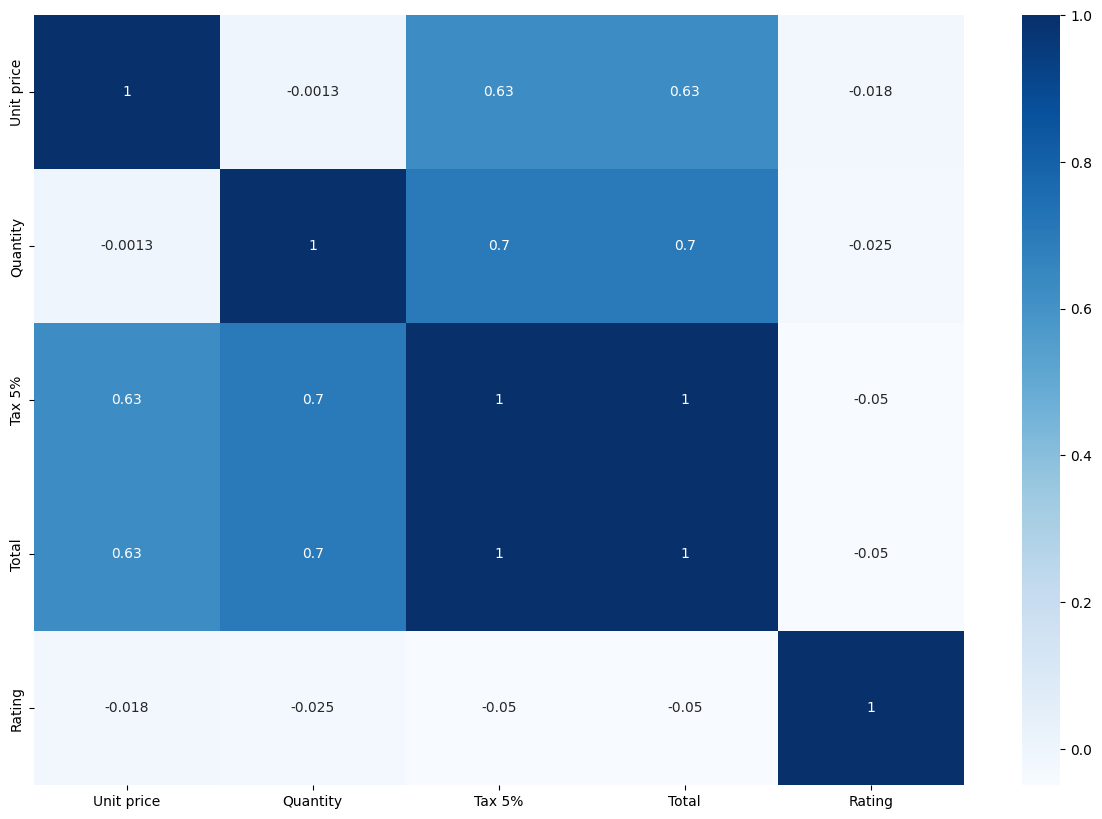

In [ ]:
Actual_Numeric=numeric_col[["Unit price"	,"Quantity"	,"Tax 5%",	"Total",	"Rating"]]
correlation = Actual_Numeric.corr()
plt.figure(figsize=(15, 10))
sb.heatmap(correlation, cmap="Blues", annot=True)
plt.show()

the heatmap confirms some expected relationships (like the link between Total and Quantity/Tax), but the lack of correlation between Rating and other variables, as well as between Unit price and Quantity, is something to dig deeper into. These findings suggest that factors other than price or sales volume may be more important in influencing customer satisfaction (Rating)

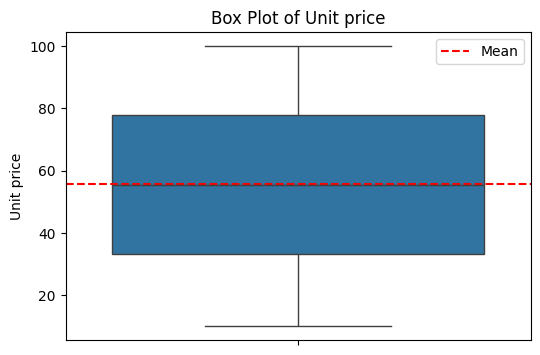

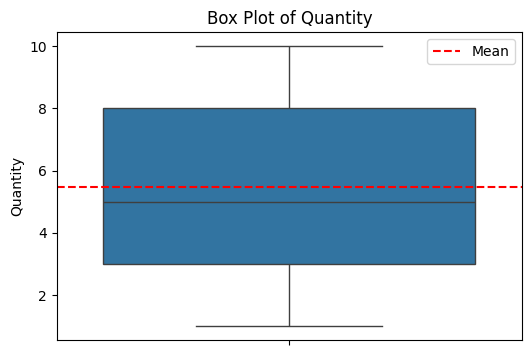

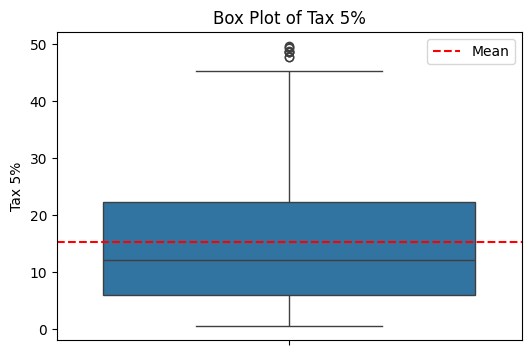

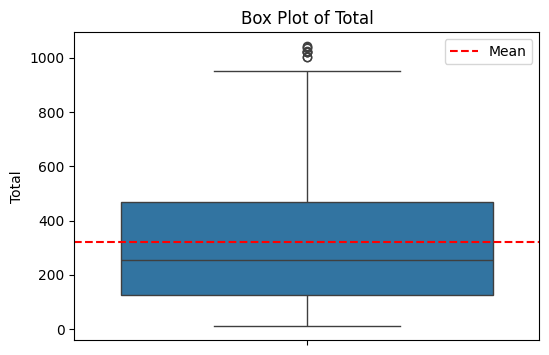

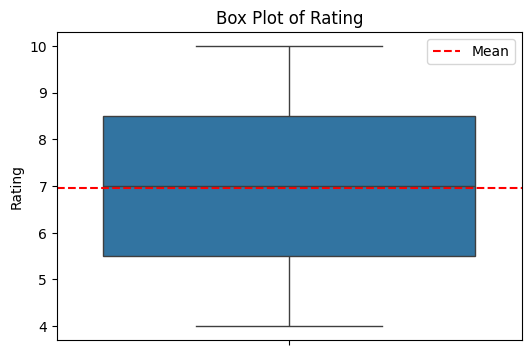

In [ ]:
for col in numeric_col[["Unit price", "Quantity", "Tax 5%", "Total", "Rating"]]:
    plt.figure(figsize=(6, 4))
    sb.boxplot(y=numeric_col[col])

    # Calculate the mean
    mean_value = numeric_col[col].mean()

    # Add the mean as a line or point
    plt.axhline(mean_value, color='r', linestyle='--', label='Mean')
    plt.legend()

    plt.title(f'Box Plot of {col}')
    plt.show()

This box plots is to check any outliers as we see the tax and total have outliers which we can't detect before the cleaning due to missing value issue but after checking te data we found that this outliers values are valid so we choose to keep them

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Supermarket_data_ML['Customer type'] = Supermarket_data_ML['Customer type'].replace({'Member': 1, 'Normal': 0, '-': None})
Supermarket_data_ML


,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,City
0,750-67-8428,A,1,0,0,0.0,Male,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1,Yangon
1,226-31-3081,C,0,1,0,0.0,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6,Naypyitaw
2,631-41-3108,A,1,0,0,0.0,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4,Yangon
3,123-19-1176,A,1,0,0,0.0,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:30,Ewallet,8.4,Yangon
4,373-73-7910,A,1,0,0,0.0,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3,Yangon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,0,1,0,0.0,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,6.2,Naypyitaw
996,303-96-2227,B,0,0,1,0.0,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,4.4,Mandalay
997,727-02-1313,A,1,0,0,1.0,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,7.7,Yangon
998,347-56-2442,A,1,0,0,0.0,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,4.1,Yangon


### visuals

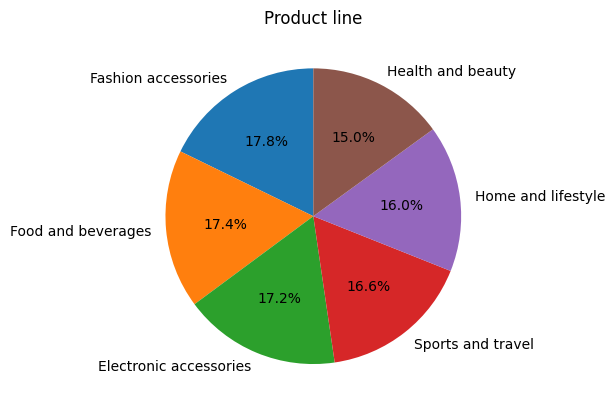

In [ ]:
Supermarket_data_copy['Product line'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Product line')
plt.ylabel('')
plt.show()

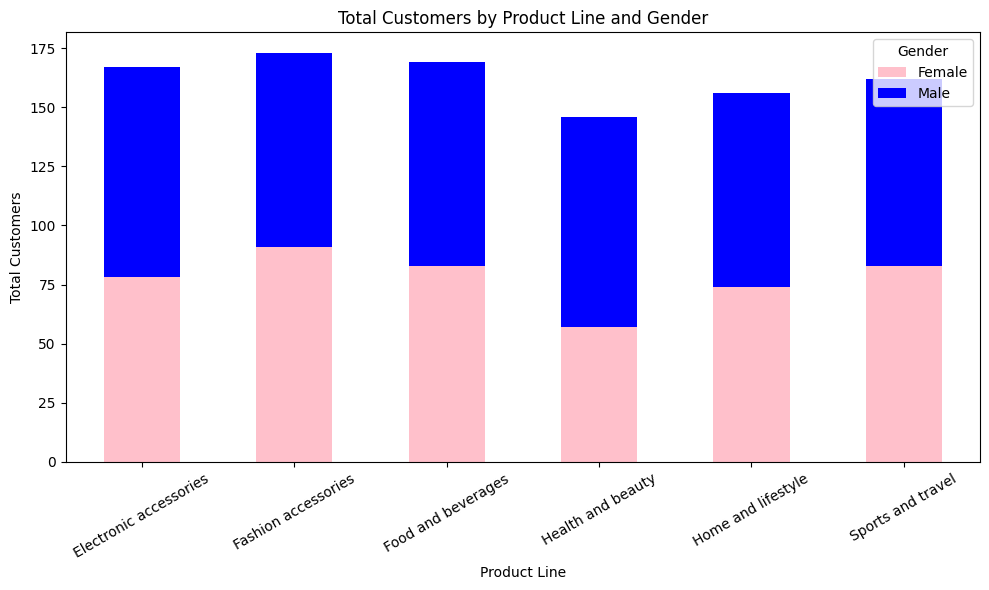

In [ ]:
grouped_data = Supermarket_data_copy.groupby(['Product line', 'Gender'])['Invoice ID'].count().unstack()

# Plot the grouped data as a bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['pink', 'blue'])

# Add labels and title
plt.xlabel('Product Line')
plt.ylabel('Total Customers')
plt.title('Total Customers by Product Line and Gender')

# Show the legend and plot
plt.legend(title='Gender')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

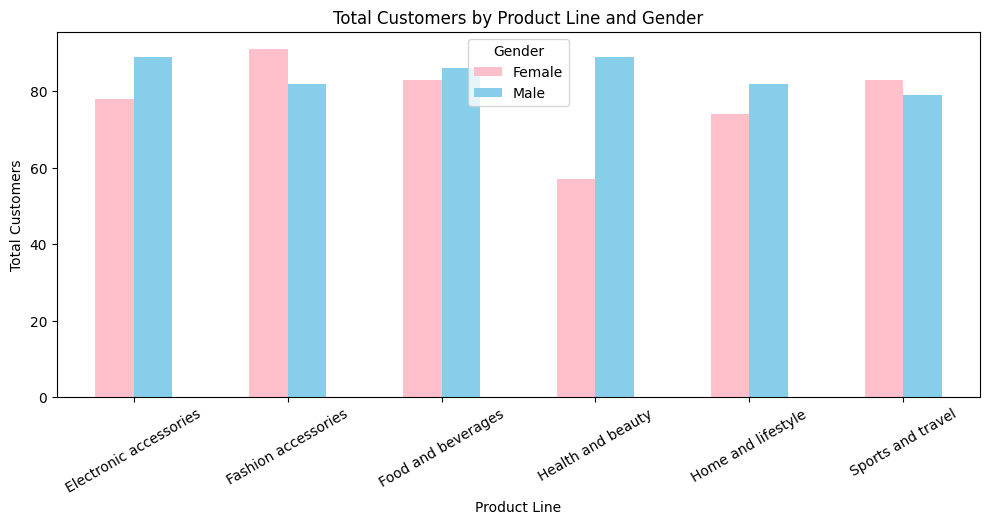

In [ ]:
grouped_data = Supermarket_data_copy.groupby(['Product line', 'Gender'])['Invoice ID'].count().unstack()

# Plot the grouped data as a bar chart
grouped_data.plot(kind='bar', figsize=(10, 6), stacked=False,color=['pink', 'skyblue'])

# Add labels and title
plt.ylabel('Total Customers')
plt.xlabel('Product Line')
plt.title('Total Customers by Product Line and Gender')

# Show the legend and plot
plt.legend(title='Gender')
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

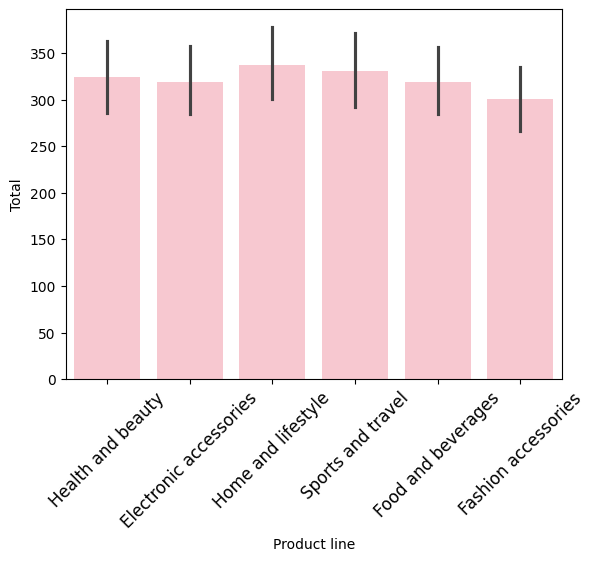

<Figure size 1000x1400 with 0 Axes>

In [ ]:
import seaborn as sns
sns.barplot(y='Total', x='Product line',color = 'pink', data=Supermarket_data_copy)
plt.xticks(rotation=45, fontsize=12)  # Adjust rotation and fontsize as needed

# Optionally, you can also adjust the size of the figure
plt.figure(figsize=(10, 14))  # Adjust figsize as needed

# Show the plot
plt.show()

<Axes: xlabel='Unit price', ylabel='Rating'>

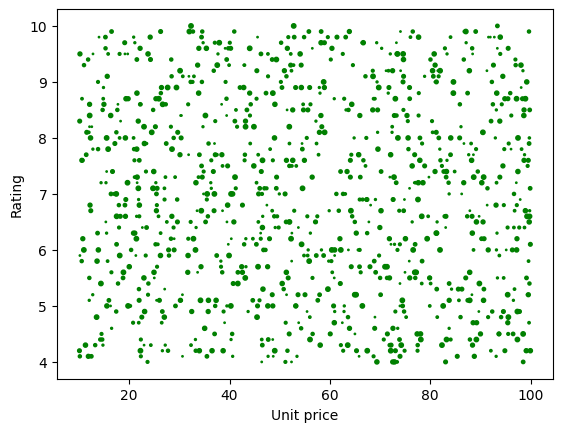

In [ ]:
Supermarket_data_copy.plot.scatter('Unit price', 'Rating',
                s = 'Quantity',
                 c = 'green'
                )

<ipython-input-56-361eea90df58>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Total', y='Product line', data=Supermarket_data_copy, palette='Set2')


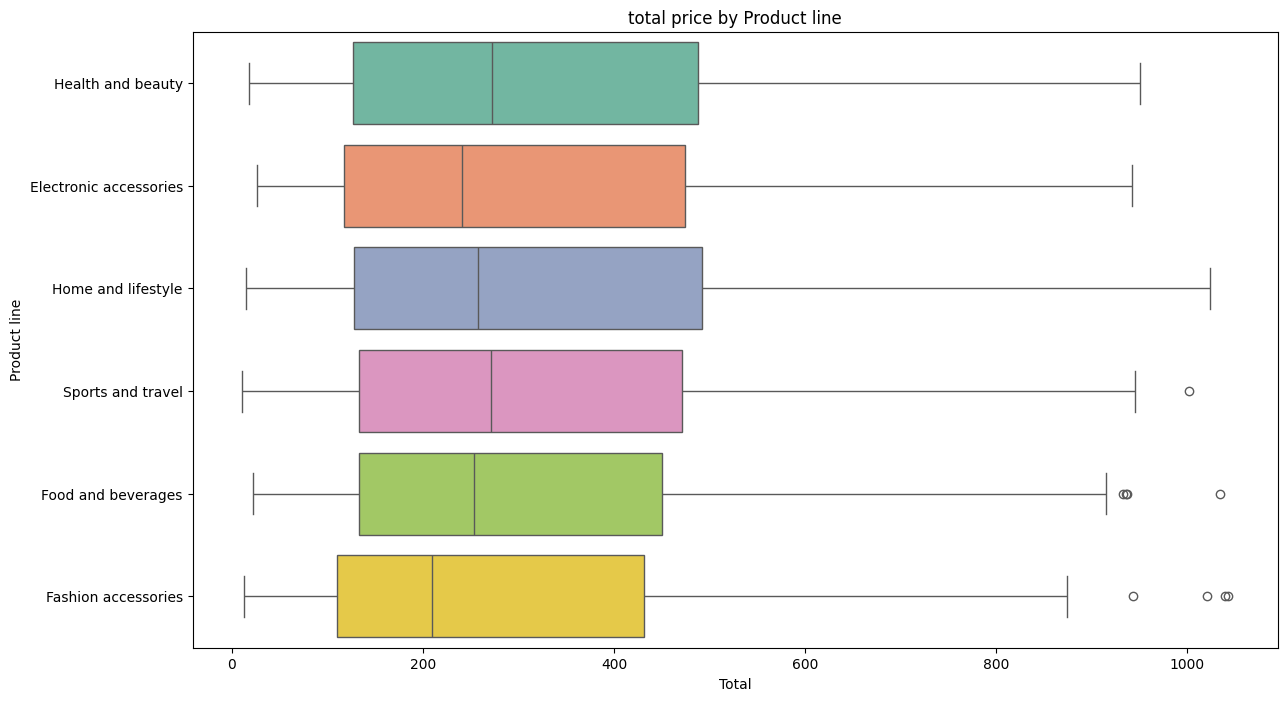

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Total', y='Product line', data=Supermarket_data_copy, palette='Set2')
plt.title('total price by Product line')
plt.xlabel('Total')
plt.ylabel('Product line')
plt.show()

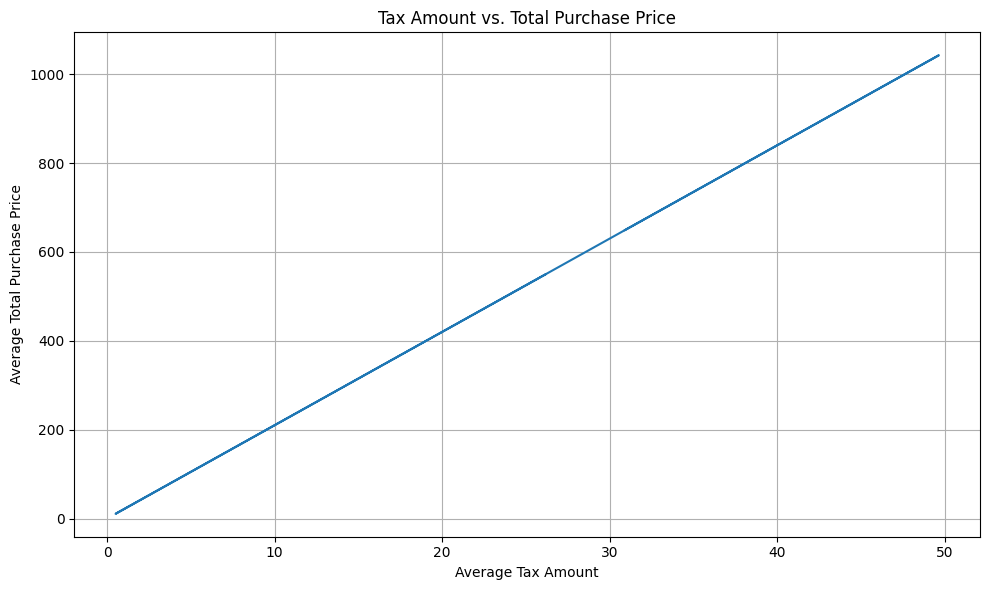

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Supermarket_data_copy['Tax 5%'],Supermarket_data_copy['Total'])
plt.title('Tax Amount vs. Total Purchase Price')
plt.xlabel('Average Tax Amount')
plt.ylabel('Average Total Purchase Price')
plt.grid(True)

plt.tight_layout()
plt.show()

### Problem

*   Inconsistent values in `Customer` column (-)
Thier count is (27) entries, equivalent to 2.7% of all data ,so we choose to apply logistic regression model to predict them


### Code


In [ ]:
# Separate known and unknown data
known_df = Supermarket_data_ML.dropna(subset=['Customer type'])  # Known membership values
unknown_df = Supermarket_data_ML[Supermarket_data_ML['Customer type'].isnull()]   # Rows where membership is missing

# Features (e.g., age, income) and target (membership)
X = known_df[["Unit price"	,"Quantity"	,"Tax 5%",	"Total",	"Rating"]]
y = known_df['Customer type']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict missing values in the unknown data
X_unknown = unknown_df[["Unit price"	,"Quantity"	,"Tax 5%",	"Total",	"Rating"]]
predictions = model.predict(X_unknown)

# Replace the missing values with the predictions
unknown_df['Customer type'] = predictions

# Merge the known and predicted data
Supermarket_data_ML = pd.concat([known_df, unknown_df])

Supermarket_data_ML['Customer type'] = Supermarket_data_ML['Customer type'].replace({1.0: 'Member', 0.0: 'Normal'})
Supermarket_data_ML

Training Accuracy: 0.53
Test Accuracy: 0.53


<ipython-input-50-b7b246274503>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_df['Customer type'] = predictions


,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,City
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1,Yangon
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6,Naypyitaw
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4,Yangon
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:30,Ewallet,8.4,Yangon
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3,Yangon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,232-11-3025,A,1,0,0,Member,Male,Sports and travel,78.77,10,39.3850,827.0850,1/24/2019,10:04,Cash,6.4,Yangon
69,382-03-4532,A,1,0,0,Normal,Female,Health and beauty,18.33,1,0.9165,19.2465,2/2/2019,18:50,Cash,4.3,Yangon
70,393-65-2792,C,0,1,0,Normal,Male,Food and beverages,89.48,10,44.7400,939.5400,1/6/2019,12:46,Credit card,9.6,Naypyitaw
71,796-12-2025,C,0,1,0,Member,Male,Fashion accessories,62.12,10,31.0600,652.2600,2/11/2019,16:19,Cash,5.9,Naypyitaw


### Test

The Result

Training Accuracy For the model = 0.53

Test Accuracy for the model = 0.53

The Results of Accuracy show that the model didn't learn very well that lead to underfitting the data so we decided to remove it

In [ ]:
Supermarket_data_ML["Customer type"].value_counts()

,count
Customer type,
Normal,533
Member,467


# 6- Final Comments

In this notebook, we worked on cleaning the data by addressing all the issues we identified. We chose not to delete the columns (Yangon, Naypyitaw, Mandalay) because they might be useful for future analysis, such as A/B testing or regression analysis. Some of the errors were detected visually and verified through code.